In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

In [4]:
vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_pickle("e_data/data'+number+'.pkl")'
    exec(new_string)

## Functions for different types of fits and curves

In [5]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

window = list(range(56,83))

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

def single_fit(spectrum):
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectrum[band_channels],p0=[.15,-12])
    final_spectrum = spectrum-powerlaw(vims_wave,*my_fit)
    return final_spectrum

def shift_ret(spectrum):
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2,.05])
    return my_fit[1]


In [6]:
df_list = []
for number in new_array:
    my_string = 'spec'+number+" = df"+number+"['spectrum']"
    exec(my_string)
    spec = 'spec'+number
    new_spec = locals()[spec]
    df_list.append(new_spec)

### Fitting All Spectra

In [7]:
#Define all fit spectra under one single list (specific year groups will be added later)
total_list = [] #total SPECTRUM list
for df in df_list:
    for spectrum in df:
        fit_thing = single_fit(spectrum)
        total_list.append(fit_thing)

# Convert all lists objects within total_list to numpy arrays
total_array = np.asarray(total_list)
print(np.shape(total_array)) # Confirms that array is working correctly (should output 12655, 256)

(12655, 256)


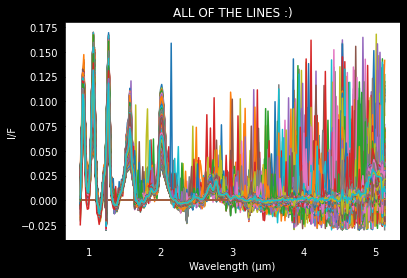

In [8]:
%matplotlib inline
mean_list = [] #List for shift to be plotted later
plt.figure(facecolor='black') # Must go before plt.plot() statement to work properly
for spectrum in total_array:
    k = 0
    for number in spectrum:
        if ((number >= .17) or (number <= -.03)): #Filtering out spectra with too high or too low I/F values
            k += 1
    if k == 0:
        plt.plot(vims_wave,spectrum)
        my_shift_value = shift_ret(spectrum)
        mean_list.append(my_shift_value)
plt.title('ALL OF THE LINES :)',color='white')
plt.xticks(color='white') #SETTING AXES TO WHITE - change these to black if you cannot read figure on repo or in standard notebook
plt.yticks(color='white')
plt.xlabel('Wavelength (µm)',color='white')
plt.ylabel('I/F',color='white')
plt.show()

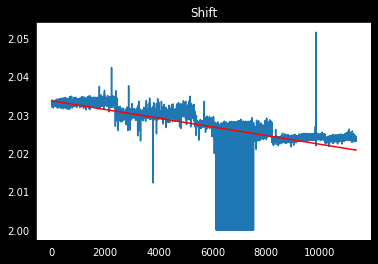

In [25]:
%matplotlib inline
plt.figure(facecolor='black')
length = len(mean_list)
x = np.linspace(0,length,length)
y = mean_list
p = np.polyval(np.polyfit(x,y,1),x)

plt.plot(x,y)
plt.plot(x,fit,color='red')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Shift',color='white')
plt.show()

### Fitting separately by year groups

In [38]:
fit_groups = []
for (spec,number) in zip(df_list,new_array):
    exec('fit_list'+number+' = []')
    for spectrum in spec:
        fit_spec = single_fit(spectrum)
        locals()['fit_list'+number].append(spectrum)
    exec('fit_array'+number+' = np.asarray(fit_list'+number+')')
    fit_groups.append(locals()['fit_array'+number])
        

In [40]:
for group in fit_groups:
    print(np.shape(group))

(2507, 256)
(3424, 256)
(749, 256)
(1487, 256)
(723, 256)
(2490, 256)
(1275, 256)
